## Minimos cuadrados: Caso Discreto

 Existen una serie de ecuaciones y pasos para aplicar el metodo de minimos cuadrados en el cual solamente se recibe una serie de puntos.
Variables (Se asume que las variables comienzan en cero):
 
 n: Numero de funciones-menos la unidad.
 
 m: Numero de nodos menos la unidad.
 
 
 $Q(x) = \begin{bmatrix}Q_0(x) & Q_1(x) & Q_2(x) &
 Q_3(x) & ... & Q_n(x)\end{bmatrix}_{\ 1xn}$
 
 
 $$Q(x)^T = \begin{bmatrix}Q_0(x) \\ Q_1(x) \\  ... \\ Q_n(x)\end{bmatrix}_{\ nx1}$$ 
 
 
 $$c = \begin{bmatrix}c_0(x) \\ c_1(x) \\  ... \\ c_n(x)\end{bmatrix}_{\ nx1}$$ 
 
 
 
 $$A_{nxn} = \sum_{i=0}^{m}Q(x_{i})^TQ(x_{i})$$
 
 
 $$b_{\ nx1} = \sum_{i=0}^{m}Q(x_{i})^Tf(x_{i})$$
 
 
 $$c = A^{-1}b$$
    

In [1]:
%matplotlib inline
from ipywidgets import widgets 
from IPython.display import display, Math, Latex
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
from sympy import *
from numpy import * 
init_printing()

In [2]:
print("Ingrese el grado a utilizar:")
grado_input = widgets.BoundedIntText(
    value=0,
    min=1,
    disabled=False
)

display(grado_input)

print("Ingrese los valores en x:")
text_x=widgets.Text();
display(text_x)
print("Ingrese los valores en y:")
text_y=widgets.Text()
display(text_y)

Ingrese el grado a utilizar:


BoundedIntText(value=1, min=1)

Ingrese los valores en x:


Text(value='')

Ingrese los valores en y:


Text(value='')

In [8]:
xi = text_x.value.split(",")
xi = set(xi)
yi= text_y.value.split(",")

try:
    xi = list(map(float, xi))
    yi = list(map(float, yi))
    xi = sorted(xi)
except:
    display(HTML("<h3 style='color:red'>Error en los datos, porfavor verificar que sean valores numericos.</h3>"))

In [9]:
if len(xi)==len(yi):
    grado = grado_input.value
    x = Symbol('x')
    p = Function('p')(x)
    rs = Function('rs')(x)
    mf = Function('mf')(x)
    mft = Function('mft')(x)

    wizzard = [0]*(grado+1)
    for i in range(0,grado+1):
        wizzard[i]=x**i
    mf = Matrix([wizzard])

    mft=mf.T

    rs=mft*mf
    display(HTML("<h3>Matriz de ecuaciones:</h3>"))
    display(rs)

    a = zeros(shape=(grado+1,grado+1))
    for i in range(0,len(xi)):
        a = a + rs.subs(x,xi[i])

    b = zeros(shape=(grado+1,1))
    for i in range(0,len(xi)):
        b = b + mft.subs(x,xi[i])*yi[i]

    display(HTML("<h3>Matriz de coeficientes:</h3>"))
    c = a.inv()*b

    display(c)
    p=0;
    for i in range(0,len(c)):
        p = p + c[i]*mf[i]
    display(HTML("<h3>Polinomio Interpolante</h3>"))
    display(Math("P(x)="+latex(p)))
else:
    display(HTML("<h3 style='color:red'>Error en los datos, porfavor verificar logitud de datos x y</h3>"))

⎡         2   3   4⎤
⎢1   x   x   x   x ⎥
⎢                  ⎥
⎢     2   3   4   5⎥
⎢x   x   x   x   x ⎥
⎢                  ⎥
⎢ 2   3   4   5   6⎥
⎢x   x   x   x   x ⎥
⎢                  ⎥
⎢ 3   4   5   6   7⎥
⎢x   x   x   x   x ⎥
⎢                  ⎥
⎢ 4   5   6   7   8⎥
⎣x   x   x   x   x ⎦

⎡ 10.849999999999 ⎤
⎢                 ⎥
⎢-14.2888888888901⎥
⎢                 ⎥
⎢6.74375000000055 ⎥
⎢                 ⎥
⎢-1.28194444444398⎥
⎢                 ⎥
⎣0.08541666666666 ⎦

<IPython.core.display.Math object>

In [11]:
print("Evaluar polinomio en un punto")
text_value = widgets.BoundedFloatText(
    value=0.0,
    step=0.1,
    description='x:',
    disabled=False
)
display(text_value)

Evaluar polinomio en un punto


BoundedFloatText(value=0.0, description='x:', step=0.1)

In [16]:
if(text_value != ""):
    display(Math("P("+latex(text_value.value)+")="+latex(p.subs(x,text_value.value))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

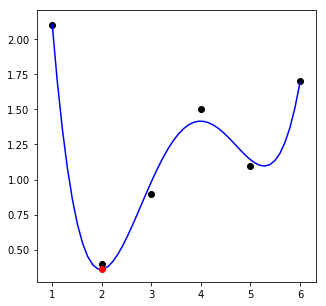

In [17]:
try:
    display(HTML("<h3>Grafica del polinomio:</h3>"))
    display(Math("P(x)="+latex(p)))
    fig,ax = plt.subplots(figsize=(5,5))
    f_l = lambdify(x,p)
    xv = linspace(xi[0],xi[len(xi)-1],50)
    ax.plot(xv, f_l(xv),color='blue');
    ax.scatter(xi,yi,color='black', marker='o');
    ax.plot(text_value.value,p.subs(x,text_value.value), color ='red',marker='o');
except:
    display(HTML("<h2 style='color:red'>Algo ocurrio mal, porfavor verifica los datos introducidos</h2>"))
